Perform Principal component analysis and perform clustering
- using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and
- obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data
(class column we have ignored at the begining who shows it has 3 clusters)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine (1).csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

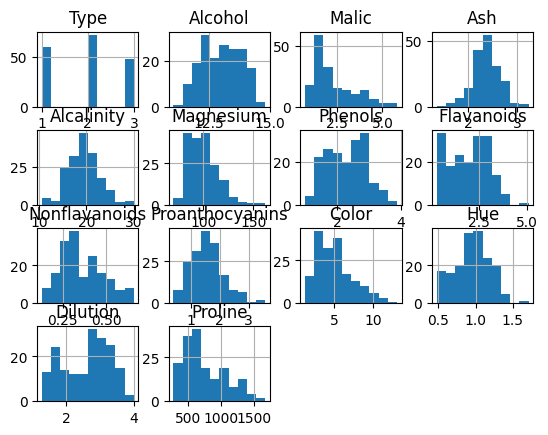

In [5]:
df.hist()

In [6]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.duplicated().sum()

0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Type'),
  Text(2, 0, 'Alcohol'),
  Text(3, 0, 'Malic'),
  Text(4, 0, 'Ash'),
  Text(5, 0, 'Alcalinity'),
  Text(6, 0, 'Magnesium'),
  Text(7, 0, 'Phenols'),
  Text(8, 0, 'Flavanoids'),
  Text(9, 0, 'Nonflavanoids'),
  Text(10, 0, 'Proanthocyanins'),
  Text(11, 0, 'Color'),
  Text(12, 0, 'Hue'),
  Text(13, 0, 'Dilution'),
  Text(14, 0, 'Proline')])

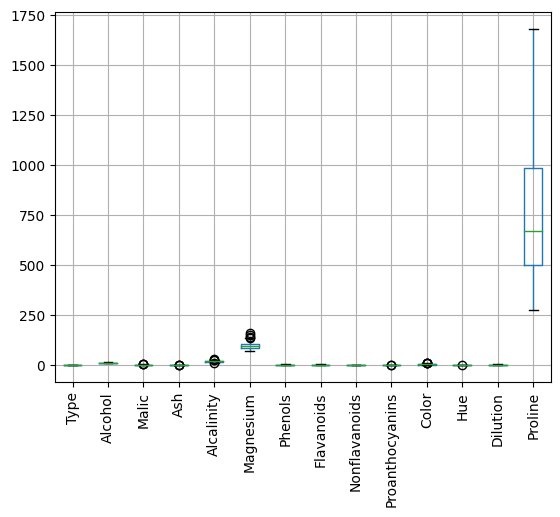

In [9]:
df.boxplot()
plt.xticks(rotation=90)

In [10]:
df['Alcalinity'].quantile(.25)

17.2

In [11]:
def outlier_treatment(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    max_lt = q3 + 1.5 * iqr
    min_lt = q1 - 1.5 * iqr

    data[column] = np.where(data[column] > max_lt, data[column].median(), data[column])
    data[column] = np.where(data[column] < min_lt, data[column].median(), data[column])
    return data[column]


In [12]:
columns = ['Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color', 'Hue']
for i in columns:
  outlier_treatment(df, i)


In [13]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = pd.DataFrame()
df_scaled[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids',
           'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']] = scaler.fit_transform(
              df[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids',
           'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']]
              )
df_scaled.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.547641,0.273971,-1.254501,2.322386,0.808997,1.034819,-0.659563,1.344130,0.352805,0.392826,1.847920,1.013009
1,0.246290,-0.479490,-0.901621,-2.712903,0.111335,0.568648,0.733629,-0.820719,-0.540944,-0.250988,0.438116,1.113449,0.965242
2,0.196879,0.085189,1.246874,-0.260136,0.193225,0.808997,1.215533,-0.498407,2.314663,0.371973,0.347536,0.788587,1.395148
3,1.691550,-0.313981,0.557734,-0.856755,1.175915,2.491446,1.466525,-0.981875,1.138825,1.387878,-0.422392,1.184071,2.334574
4,0.295700,0.309113,2.057627,0.535356,1.585369,0.808997,0.663351,0.226796,0.466917,-0.279740,0.392826,0.449601,-0.037874


In [15]:
from sklearn.decomposition import PCA

pca=PCA()
pca_components = pd.DataFrame(pca.fit_transform(df_scaled))
pca_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.459757,-1.658053,0.082919,-0.084664,0.709117,0.001396,0.779608,0.470258,0.805707,0.801911,-0.262571,-0.919710,-0.251601
1,2.367190,0.263031,-1.969243,-0.607071,0.518867,-1.050915,0.400211,-0.724923,-0.598218,0.573288,-0.094103,-0.235673,-0.020522
2,2.586867,-1.014709,1.092784,0.864789,-0.790686,0.398612,0.076673,0.841009,-1.013751,-0.050838,-0.224000,-0.147957,0.090006
3,3.883489,-2.797932,-0.042166,0.600178,-0.264936,0.380990,-0.100761,-0.917172,0.037920,0.052311,-0.570746,0.385619,-0.382676
4,0.974746,-1.118313,2.417194,-0.137793,0.427157,-0.226824,0.636302,0.070017,0.162161,0.238015,0.473560,-0.049123,-0.032242


In [16]:
# The amount of variance that each PCA explains is
pca.explained_variance_ratio_

array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276,
       0.01903084, 0.01554002, 0.00773979])

In [17]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([37.09, 57.42, 66.96, 73.9 , 79.92, 84.34, 88.25, 91.15, 93.63,
       95.77, 97.67, 99.22, 99.99])

In [18]:
pca.components_

array([[ 0.15843193, -0.22949146, -0.00900944, -0.28184217,  0.12804436,
         0.39166918,  0.42149646, -0.28918228,  0.31811799, -0.05327639,
         0.29483535,  0.36947873,  0.29008829],
       [-0.4605688 , -0.24730811, -0.31509024,  0.03817107, -0.37576585,
        -0.03571682,  0.02510589, -0.03199428,  0.00391039, -0.51258578,
         0.25254414,  0.17726316, -0.35197492],
       [-0.15281202,  0.04325352,  0.68696786,  0.55094626,  0.1771668 ,
         0.15251558,  0.11028367,  0.14399895,  0.10486423, -0.24140296,
         0.10878308,  0.1509669 , -0.08869653],
       [-0.05291463,  0.56164356, -0.17780202,  0.14569654, -0.19119538,
         0.17761175,  0.15204262, -0.22795429,  0.43341081,  0.05437804,
        -0.451599  ,  0.18597017, -0.23749806],
       [-0.21657107,  0.08838287, -0.05992484, -0.0050366 ,  0.61489746,
        -0.11477611, -0.0457467 , -0.63643691, -0.30447061, -0.16219391,
        -0.07892118,  0.0118019 , -0.13369702],
       [-0.19262656, -0.658777

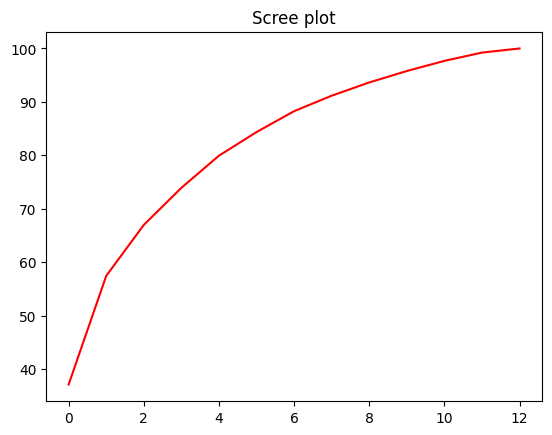

In [19]:
# Variance plot for PCA components obtained  Scree plot
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100), color="red")
plt.title('Scree plot')
plt.show()

In [20]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [21]:
df_analysis = pd.DataFrame()
df_analysis['Type'] = df['Type']
df_analysis[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']] = pca_components.iloc[:,:6]
df_analysis.head()

,Type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,1,3.459757,-1.658053,0.082919,-0.084664,0.709117,0.001396
1,1,2.367190,0.263031,-1.969243,-0.607071,0.518867,-1.050915
2,1,2.586867,-1.014709,1.092784,0.864789,-0.790686,0.398612
3,1,3.883489,-2.797932,-0.042166,0.600178,-0.264936,0.380990
4,1,0.974746,-1.118313,2.417194,-0.137793,0.427157,-0.226824


<Axes: xlabel='PCA1', ylabel='PCA2'>

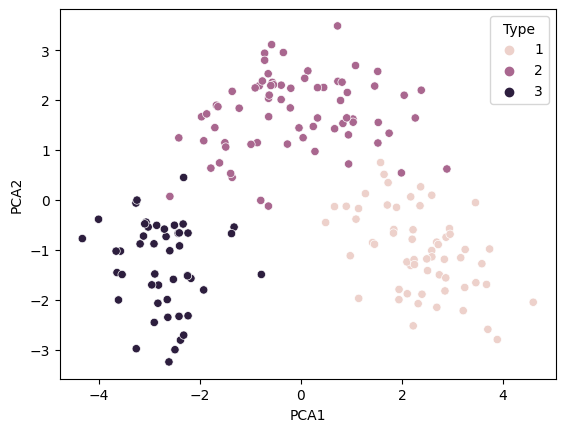

In [22]:
import seaborn as sns
sns.scatterplot(data=df_analysis, x='PCA1', y='PCA2', hue = 'Type')

# Hierarchical/Agglomerative_Clustering

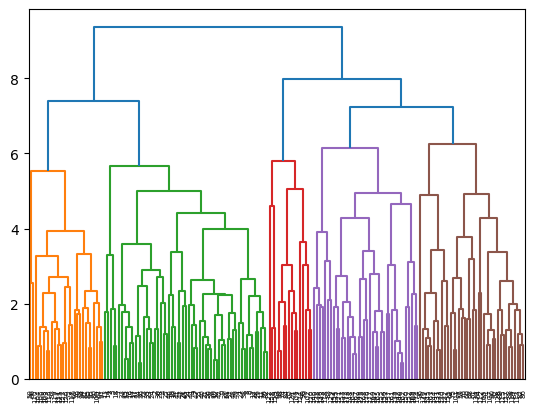

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendo = dendrogram(linkage(df_analysis.iloc[:,1:], method='complete'))

In [24]:
# create model for hierachical clusters
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_analysis.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_analysis.iloc[:,1:])

# storing predcited data in main data
df_analysis['Hierachical_Predicted_Cluster']=y_pred

# sorting of data based on predicted data
df_analysis=df_analysis.sort_values('Hierachical_Predicted_Cluster')

df_analysis.iloc[:,[0,-1]].tail(10)

,Type,Hierachical_Predicted_Cluster
65,2,2
159,3,2
102,2,2
71,2,2
74,2,2
79,2,2
84,2,2
109,2,2
158,3,2
98,2,2


In [25]:
import collections

collections.Counter(model.labels_)

Counter({0: 86, 1: 76, 2: 16})

In [26]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [27]:
df_analysis.head(1)

,Type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Hierachical_Predicted_Cluster
0,1,3.459757,-1.658053,0.082919,-0.084664,0.709117,0.001396,0


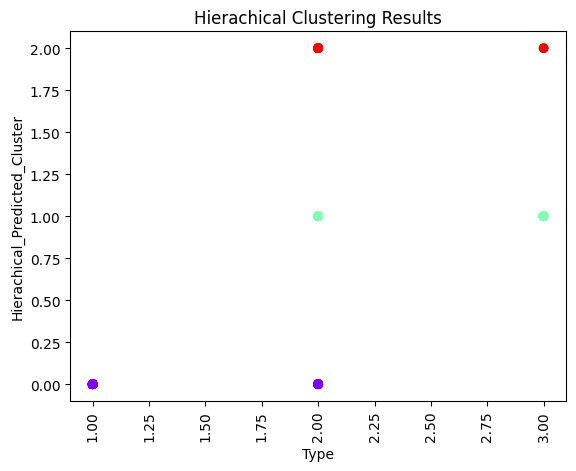

In [28]:
# Visualize the clustered data points
plt.scatter(df_analysis.iloc[:, 0], df_analysis.Hierachical_Predicted_Cluster, c=df_analysis.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.title('Hierachical Clustering Results')
plt.xlabel('Type')
plt.ylabel('Hierachical_Predicted_Cluster')
plt.xticks(rotation=90);


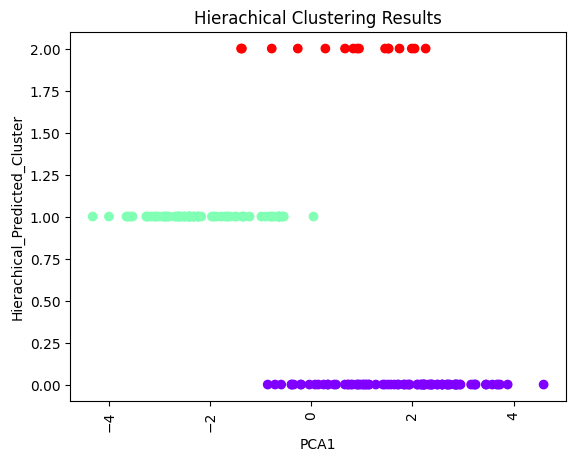

In [29]:
# Visualize the clustered data points
plt.scatter(df_analysis.iloc[:, 1], df_analysis.Hierachical_Predicted_Cluster, c=df_analysis.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.title('Hierachical Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('Hierachical_Predicted_Cluster')
plt.xticks(rotation=90);


In [30]:
from sklearn.metrics import silhouette_score
print('silhouette_score for Hierarchical Model is:', round(silhouette_score(df_analysis.iloc[:, 1:7], y_pred)*100, 2), '%')

silhouette_score for Hierarchical Model is: 1.14 %


#K-Means

Text(0, 0.5, 'WCSS')

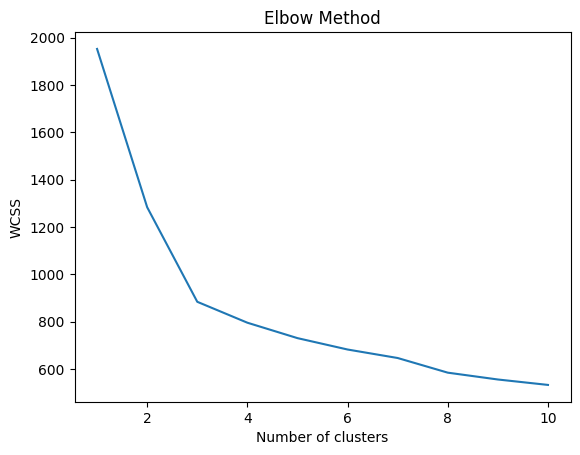

In [31]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

from sklearn.cluster import KMeans
wcss = [] # list to contain inertia for different no. of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init= 'auto' , random_state=42)
    kmeans.fit(df_analysis.iloc[:, 1:7])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Elbow plot suggest 3 clusters

In [32]:
## Create a K-means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df_analysis.iloc[:, 1:7])

KMeans_Predicted_Cluster= model.fit_predict(df_analysis.iloc[:, 1:7]) # can also be fetched from model.labels_

# storing predcited data in main data
df_analysis['KMeans_Predicted_Cluster']=KMeans_Predicted_Cluster

# sorting of data based on predicted data
df_analysis=df_analysis.sort_values('KMeans_Predicted_Cluster')

df_analysis.iloc[:,[0,-1]].tail()

,Type,KMeans_Predicted_Cluster
124,2,2
99,2,2
158,3,2
65,2,2
98,2,2


In [33]:
collections.Counter(kmeans.labels_)

Counter({2: 66, 0: 61, 1: 51})

In [34]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

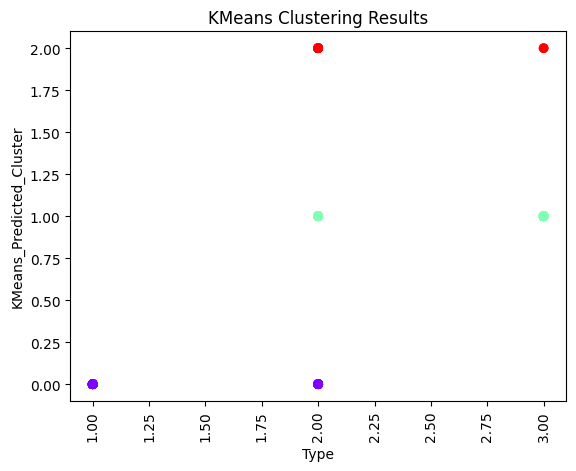

In [35]:
# Visualize the clustered data points
plt.scatter(df_analysis.iloc[:, 0], df_analysis.KMeans_Predicted_Cluster, c=df_analysis.KMeans_Predicted_Cluster, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel('Type')
plt.ylabel('KMeans_Predicted_Cluster')
plt.xticks(rotation=90);


In [36]:
print('silhouette_score for KMeans Model is:', round(silhouette_score(df_analysis.iloc[:, 1:7], KMeans_Predicted_Cluster)*100, 2), '%')

silhouette_score for KMeans Model is: 16.95 %


## Since KMeans is performing better on this data, we will consider Kmeans for future considerations

## Now lets us check for silhouette_score for different PCA(n_components)

#n_components= 2

In [37]:
pca=PCA(n_components= 2)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled))

df_pca = pd.DataFrame()
df_pca['Type'] = df['Type']
df_pca[['PCA1', 'PCA2']] = pca_components


# create model for hierachical clusters
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_pca.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_pca.iloc[:,1:])

print('hierachical labels:', collections.Counter(model.labels_))

print('silhouette_score for Hierarchical Model is:', round(silhouette_score(df_pca.iloc[:, 1:3], y_pred)*100, 2), '%')

## Create a K-means clustering model

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df_pca.iloc[:, 1:3])

KMeans_Predicted_Cluster= model.fit_predict(df_pca.iloc[:, 1:3]) # can also be fetched from model.labels_

# storing predcited data in main data
df_pca['KMeans_Predicted_Cluster']=KMeans_Predicted_Cluster

print('KMeans labels:', collections.Counter(kmeans.labels_))

print('silhouette_score for KMeans Model is:', round(silhouette_score(df_pca.iloc[:, 1:3], KMeans_Predicted_Cluster)*100, 2), '%')

hierachical labels: Counter({0: 80, 1: 59, 2: 39})
silhouette_score for Hierarchical Model is: 38.98 %
KMeans labels: Counter({0: 68, 2: 61, 1: 49})
silhouette_score for KMeans Model is: 38.98 %


#n_components= 3

In [38]:
pca=PCA(n_components= 3)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled))

df_pca = pd.DataFrame()
df_pca['Type'] = df['Type']
df_pca[['PCA1', 'PCA2', 'PCA3']] = pca_components


# create model for hierachical clusters
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_pca.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_pca.iloc[:,1:])

print('hierachical labels:', collections.Counter(model.labels_))

print('silhouette_score for Hierarchical Model is:', round(silhouette_score(df_pca.iloc[:, 1:4], y_pred)*100, 2), '%')

## Create a K-means clustering model

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df_pca.iloc[:, 1:4])

KMeans_Predicted_Cluster= model.fit_predict(df_pca.iloc[:, 1:4]) # can also be fetched from model.labels_

# storing predcited data in main data
df_pca['KMeans_Predicted_Cluster']=KMeans_Predicted_Cluster

print('KMeans labels:', collections.Counter(kmeans.labels_))

print('silhouette_score for KMeans Model is:', round(silhouette_score(df_pca.iloc[:, 1:4], KMeans_Predicted_Cluster)*100, 2), '%')

hierachical labels: Counter({0: 87, 2: 46, 1: 45})
silhouette_score for Hierarchical Model is: 39.98 %
KMeans labels: Counter({0: 66, 2: 61, 1: 51})
silhouette_score for KMeans Model is: 39.98 %


#n_components= 4

In [39]:
pca=PCA(n_components= 4)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled))

df_pca = pd.DataFrame()
df_pca['Type'] = df['Type']
df_pca[['PCA1', 'PCA2', 'PCA3', 'PCA4']] = pca_components


# create model for hierachical clusters
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_pca.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_pca.iloc[:,1:])

print('hierachical labels:', collections.Counter(model.labels_))

print('silhouette_score for Hierarchical Model is:', round(silhouette_score(df_pca.iloc[:, 1:5], y_pred)*100, 2), '%')

## Create a K-means clustering model

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df_pca.iloc[:, 1:5])

KMeans_Predicted_Cluster= model.fit_predict(df_pca.iloc[:, 1:5]) # can also be fetched from model.labels_

# storing predcited data in main data
df_pca['KMeans_Predicted_Cluster']=KMeans_Predicted_Cluster

print('KMeans labels:', collections.Counter(kmeans.labels_))

print('silhouette_score for KMeans Model is:', round(silhouette_score(df_pca.iloc[:, 1:5], KMeans_Predicted_Cluster)*100, 2), '%')

hierachical labels: Counter({0: 81, 2: 50, 1: 47})
silhouette_score for Hierarchical Model is: 28.47 %
KMeans labels: Counter({0: 66, 2: 61, 1: 51})
silhouette_score for KMeans Model is: 28.47 %


#n_components= 5

In [40]:
pca=PCA(n_components= 5)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled))

df_pca = pd.DataFrame()
df_pca['Type'] = df['Type']
df_pca[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']] = pca_components


# create model for hierachical clusters
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_pca.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_pca.iloc[:,1:])

print('hierachical labels:', collections.Counter(model.labels_))

print('silhouette_score for Hierarchical Model is:', round(silhouette_score(df_pca.iloc[:, 1:6], y_pred)*100, 2), '%')

## Create a K-means clustering model

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df_pca.iloc[:, 1:6])

KMeans_Predicted_Cluster= model.fit_predict(df_pca.iloc[:, 1:6]) # can also be fetched from model.labels_

# storing predcited data in main data
df_pca['KMeans_Predicted_Cluster']=KMeans_Predicted_Cluster

print('KMeans labels:', collections.Counter(kmeans.labels_))

print('silhouette_score for KMeans Model is:', round(silhouette_score(df_pca.iloc[:, 1:6], KMeans_Predicted_Cluster)*100, 2), '%')

hierachical labels: Counter({0: 84, 1: 83, 2: 11})
silhouette_score for Hierarchical Model is: 19.47 %
KMeans labels: Counter({0: 66, 2: 61, 1: 51})
silhouette_score for KMeans Model is: 19.47 %


# #n_components= 3 is giving best result